If you have never used google colab before check out this documentation: https://colab.research.google.com/notebooks/intro.ipynb

# Preliminaries: Import necessary modules
First, we will import the libraries needed to run the practical. In python, several toolboxes are regularly used: scipy (for maths), matplotlib (for plotting) and numpy (for arrays).
All the code written in this script can be loaded using the play button on the left of the coding block.

In [ ]:
# basic modules
import os
import sys
import numpy as np
import pandas as pd
import scipy.linalg as la
import matplotlib.pyplot as plt

# Part 1: The General Linear Model



## 1.1 Generated data

1. Let's generate some noisy data using a linear model with a single regressor and an intercept, i.e. y = a + b * x

In [ ]:
x = np.arange(20)
intercept = -10
slope = 2.5
y = intercept + slope * x

# add some noise
y = y + 10 * np.random.normal(size=x.shape)

2. Now, let's plot the data y against x:

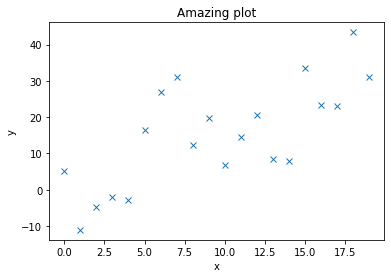

In [ ]:
plt.plot(x,y,'x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Amazing plot')
plt.show()

3. Compare fitting a linear model with and without the intercept. To do this, we will first create two design matrices... 

In [ ]:
M1 = np.zeros((len(x),1))
M1[:,0] = x

M2 = np.zeros((len(x), 2))
M2[:,0] = x
M2[:,1] = np.ones(len(x))

print('M1 =',M1)
print('M2 =',M2)

M1 = [[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]]
M2 = [[ 0.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]
 [11.  1.]
 [12.  1.]
 [13.  1.]
 [14.  1.]
 [15.  1.]
 [16.  1.]
 [17.  1.]
 [18.  1.]
 [19.  1.]]


***Q. Do you understand why these design matrices look the way they do?*** 

4. Now fit these GLM models (i.e. find the best values for beta).

**Some Tips:**
* you can use the numpy function np.linalg.pinv()
* Remember that by default the * operator in python means element-wise product. To do matrix multiplication use the .dot() operation. For example, to compute the matrix vector product **M** * **x** you would use **M**.dot(**x**)

In [ ]:
beta1 = np.linalg.pinv(M1).dot(y)
beta2 = np.linalg.pinv(M2).dot(y)

print(beta1)
print(beta2)

[1.63617788]
[ 1.72701047 -1.18082374]


***Q. How should we interpret the values of beta1 and beta2? how do they relate to the design matrices you have specified above?***

7. Plot the two models against the data

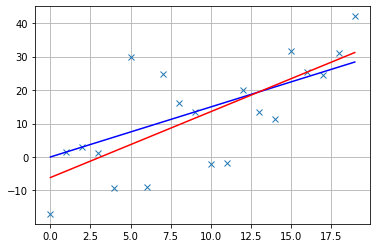

In [ ]:
plt.plot(x, y, 'x')
plt.plot(x, M1.dot(beta1),'b')
plt.plot(x, M2.dot(beta2),'r')

plt.grid()
plt.show()

Note how the red line must go through the origin (0,0), as there is no intercept in the model (the intercept is always zero). 

Note also how in this case the slope is higher when modelling the intercept. If we were to do statistics on this slope coefficient (to determine if it were significantly different from zero), would we find it more or less significant than if we hadn't modelled the intercept?


8. (Optional) Compare fitting the same M2 model (i.e. with a column of one's as a regressor), with and without demeaning x (to demean x, you’ll want to subtract the mean of x off of each element of x). What happens to the beta coefficients? 

In [ ]:
xm = x - np.mean(x)

M3 = np.zeros((len(x), 2))
M3[:,0] = xm
M3[:,1] = np.ones(len(x))

beta3 = np.linalg.pinv(M3).dot(y)
print(beta3)

[ 1.96755906 12.54041423]


***Q. (Optional) How do we interpret the values in beta2 after demeaning x?***

## 1.2 Real data
1. Now, let's have some fun with some real data ... First, load the Oxford Weather dataset that we already looked at in the. If you were smart and saved it, you can just load the pickled dataset. If you didn't do that, take a look at the Pandas demo on [Github](https://github.com/predictive-clinical-neuroscience/BigDataCourse/blob/main/demos/) and do that now ;)

In [ ]:
# If you are not connected to your drive anymore run this snippet again
from google.colab import drive
drive.mount('/content/drive') 
os.chdir('drive/My Drive/BMS85/data') 

2. Load the previously pickled dataset

In [87]:
df = pd.read_pickle('OxfordWeather.pkl')

3. We are going to fit a polynomial model to the oxfordweather data again, but this time making our own design matrix. We want to predict the mean temperature (y) from the month (x). 

In [88]:
x = df['month'].to_numpy()
y = df['meanTemp'].to_numpy()

4. Now we will make three design matrixes: a linear model without intercept, a linear model with intercept and a polynomial model of order 2. The design matrix will contain an extra column containing x-squared (in python code x**2). (see also in the Pandas demo print(xp) for an example of what the design matrix should look like)

In [89]:
M1 = np.zeros((len(x),1))
M1[:,0] = x

M2 = np.zeros((len(x), 2))
M2[:,0] = np.ones(len(x))
M2[:,1] = x

M3 = np.zeros((len(x),3))
M3[:,0] = np.ones(len(x))
M3[:,1] = x
M3[:,2] = x**2

print(M3)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 ...
 [  1.  10. 100.]
 [  1.  11. 121.]
 [  1.  12. 144.]]


5. Then we will calculate the betas again, as previously done in part 1.1, using the np.linalg.pinv() function:

In [ ]:
beta1 = np.linalg.pinv(M1).dot(y)
beta2 = np.linalg.pinv(M2).dot(y)
beta3 = np.linalg.pinv(M3).dot(y)

print(beta1)
print(beta2)
print(beta3)

[1.3196747]
[7.8763965  0.37450712]
[-4.0969195   5.50592826 -0.3947247 ]


***Q. How can we intrepret beta3?***


6. Finally, we will plot the three models and compare them.

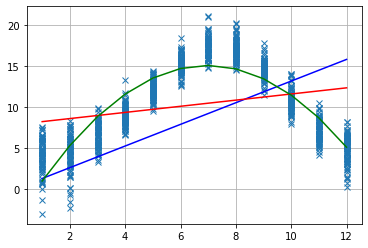

In [ ]:
# We will transform the data a bit to plot the polynomial correctly:
x2 = np.linspace(1,12,12)
x2 = x2[:, np.newaxis]
ypred = M3.dot(beta3)[0:np.size(x2)]
plt.plot(x, y, 'x')
plt.plot(x, M1.dot(beta1),'b')
plt.plot(x, M2.dot(beta2),'r')
plt.plot(x2, ypred, 'g')

plt.grid()
plt.show()

***Q. Can you adapt the code to make a polynomial model of order 3? Hint: Make an M4 design matrix including a fourth column with x^3***

# Part 2: Principal Components Analysis 



## 2.1 Load data

We are going to perform a dimensionality reduction technique called principal component analysis (PCA). Let's perform PCA on some interesting data. Download the mill image from brightspace and upload it on the left hand side under files. Show it using the imshow() function:

First, we need to get the data



### Option 1: Download to your Google drive

You will need to download the file *mill.npy* from the following location and save it to your google drive

[GitHub data](https://github.com/predictive-clinical-neuroscience/BigDataCourse/blob/main/data/)

In [ ]:
# needed for you to be able to save the necessary data to your google drive
from google.colab import drive
drive.mount('/content/drive')

# change dir to data on your google drive
# change BMS85/data to where you saved mill.mat 
os.chdir('drive/My Drive/BMS85/data/') 

### Option 2: Download directly from GitHub

In [ ]:
!wget -nc https://raw.githubusercontent.com/predictive-clinical-neuroscience/BigDataCourse/main/data/mill.npy

File ‘mill.npy’ already there; not retrieving.



Now, we can actually do the work... 

Text(0.5, 1.0, 'original')

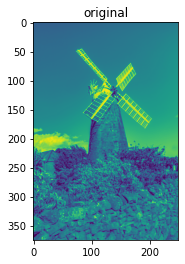

In [ ]:
img = np.load('mill.npy')
plt.figure()
plt.imshow(img)
plt.title('original')

## 2.2 Perform PCA
PCA is performed by an eigendecomposition of the covariance matrix. Putting the mathematics aside; first, we subtract the mean from our image. Then we calculate the covariance using the cov() function and find the eigenvalues and eigenvectors using the eig() function. For more details of each function look at the numpy documentation (https://numpy.org/doc/stable/reference/routines.linalg.html).

In [ ]:
x = img
m = np.mean(x,0)
x = x - np.tile(m,[np.size(x,0),1])
covmat = np.cov(x.T)
[evals, evecs] = la.eig(covmat)

Now we compute the total percentage of variance explained by eigenvectors 1, 1:2, 1:3, ..., 1:n. Then plot the results against the number of eigenvectors that contributed to the total variance explained:

/Users/andmar/sfw/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


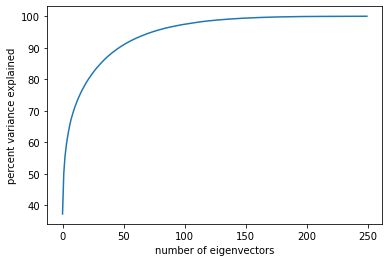

In [ ]:
pve = np.cumsum(evals)/np.sum(evals)*100
plt.figure()
plt.plot(range(0,np.size(evals)),pve)
plt.xlabel('number of eigenvectors');
plt.ylabel('percent variance explained');

Create a vector ‘keep’ that indicates which of the top eigenvectors to keep if we wish to explain at least 90% of the total variance:

In [ ]:
keep = pve<80


How many eigenvectors do we need to explain at least 90% of the variance?

In [ ]:
n = sum(keep)
print(n)

22


Overwrite ‘evecs’ so that it contains only the eigenvectors indicated by ‘keep’ (this is the reduced PCA space):

In [ ]:
evecs = evecs[:,keep]

Compute the scores of x in the reduced PCA space by pre-multiplying the eigenvectors in evecs by x:

In [ ]:
scores = np.dot(x, evecs)

## 2.3 Dimensionality reduction
Now we can reconstruct the image using the scores by post-multiplying them by the transpose of evecs and then adding the mean back again:


Text(0.5, 1.0, 'compressed')

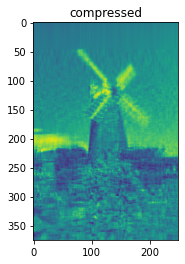

In [ ]:
y = np.dot(scores, evecs.T)
y = y + np.tile(m,[np.size(y,0),1])

plt.figure()
plt.imshow(y)
plt.title('compressed')

As you can see we can reconstruct the original image pretty well using only a subset of the eigenvectors. This means that instead of needing all of the information in ‘img’ we can just store the information in ‘evecs’ and ‘scores’. Let’s see how much storage space this saves us and then compute the compression ratio:

In [ ]:
kb_img = sys.getsizeof(x)/1000
print(['original image: ' + np.str(kb_img) + ' kb'])
kb_y = (sys.getsizeof(scores) + sys.getsizeof(evecs))/1000
print(['compressed image: ' + np.str(kb_y) + ' kb']);
compr_pct = (1 - kb_y / kb_img) * 100
print(['compression ratio: ' + np.str(compr_pct) + ' %'])